In [1]:
library(tidyverse)
library(readxl)
library(hash)


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4          v readr     2.1.5     
v forcats   1.0.0          v stringr   1.5.1     
v ggplot2   3.5.1          v tibble    3.2.1.9024
v lubridate 1.9.3          v tidyr     1.3.1     
v purrr     1.0.2          
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
hash-2.2.6.3 provided by Decision Patterns




In [3]:
modify_patient_id <- function(string){
    splitted_str  <- str_split_1(string)
    if (length(splitted_str) == 3)
    {
        return(paste(splitted_str[1:2], sep="-"))
    } else
    {
        return(paste(splitted_str, sep="-"))
    }
}

In [28]:
data_df <- read_csv("data/dengue/small_transcriptome/denv.csv", show_col_types = FALSE)
data_df <- data_df %>%
    t() %>%
    as.data.frame() %>%
    mutate(parameter = rownames(.)) %>%
    `rownames<-`(NULL)

colnames(data_df)           <- data_df[1, ]
data_df                     <- data_df[-1, ]
data_disease_df             <- data_df[, c("Sample_title", "diagnosis")]
data_disease_df[ , 3:4]     <- str_split_fixed(data_disease_df$diagnosis, ": ", 2)
data_disease_df             <- data_disease_df[, c("Sample_title", "V4")]

colnames(data_disease_df)   <- c("patient_ID", "disease")
data_disease_df[ , 3:5]     <- str_split_fixed(data_disease_df$patient_ID, "-", 3)
data_disease_df             <- data_disease_df[, c("patient_ID", "disease",	"V3",	"V4")]
data_disease_df$patient_ID2 <- paste(data_disease_df$V3, data_disease_df$V4, sep="-")
data_disease_df             <- data_disease_df[, c("patient_ID2", "disease")]
colnames(data_disease_df)   <- c("patient_ID", "disease")



,patient_ID,disease
,<chr>,<chr>
2,1-001,DSS
3,1-001,DSS
4,1-001,DSS
5,1-001,DSS
6,1-002,DSS
7,1-002,DSS
8,1-002,DSS
9,1-003,DF
10,1-003,DF


In [31]:
gene_exp_df <- read_excel("data/dengue/small_transcriptome/denv_pcr.xlsx")
gene_exp_df %>% filter(!(patient_ID %in% "3-004-01")) -> gene_exp_df

merge(gene_exp_df, data_disease_df, by = "patient_ID") -> merged_df
merged_df

patient_ID,plate_ID,mRNA,Value,Quality,Call,Threshold,disease
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1-001,S07-A02,BMP2K,13.73141,0.9425785,Pass,0.003787858,DSS
1-001,S07-A02,BMP2K,13.73141,0.9425785,Pass,0.003787858,DSS
1-001,S07-A02,BMP2K,13.73141,0.9425785,Pass,0.003787858,DSS
1-001,S07-A02,BMP2K,13.73141,0.9425785,Pass,0.003787858,DSS
1-001,S03-A45,NCR3,24.62701,0.2007100,Pass,0.002273239,DSS
1-001,S03-A45,NCR3,24.62701,0.2007100,Pass,0.002273239,DSS
1-001,S03-A45,NCR3,24.62701,0.2007100,Pass,0.002273239,DSS
1-001,S03-A45,NCR3,24.62701,0.2007100,Pass,0.002273239,DSS
1-001,S03-A46,TRERF1,21.55679,0.9415901,Pass,0.002273239,DSS


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


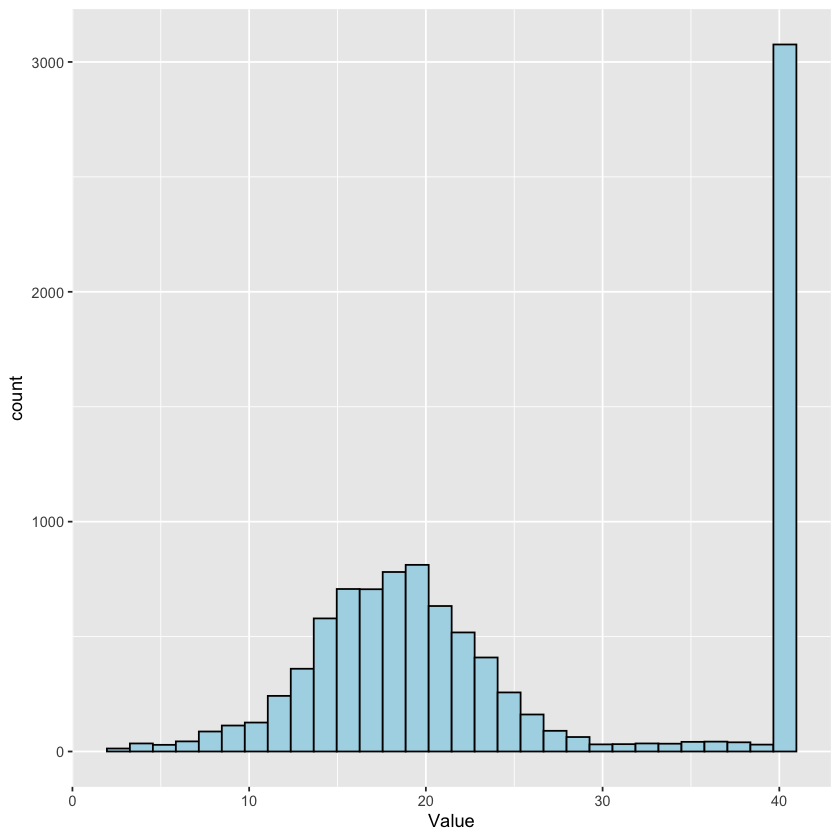

In [32]:
library(ggplot2)

# Change colors
p <- ggplot(gene_exp_df, aes(x=Value)) + geom_histogram(color="black", fill="lightblue")
p

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


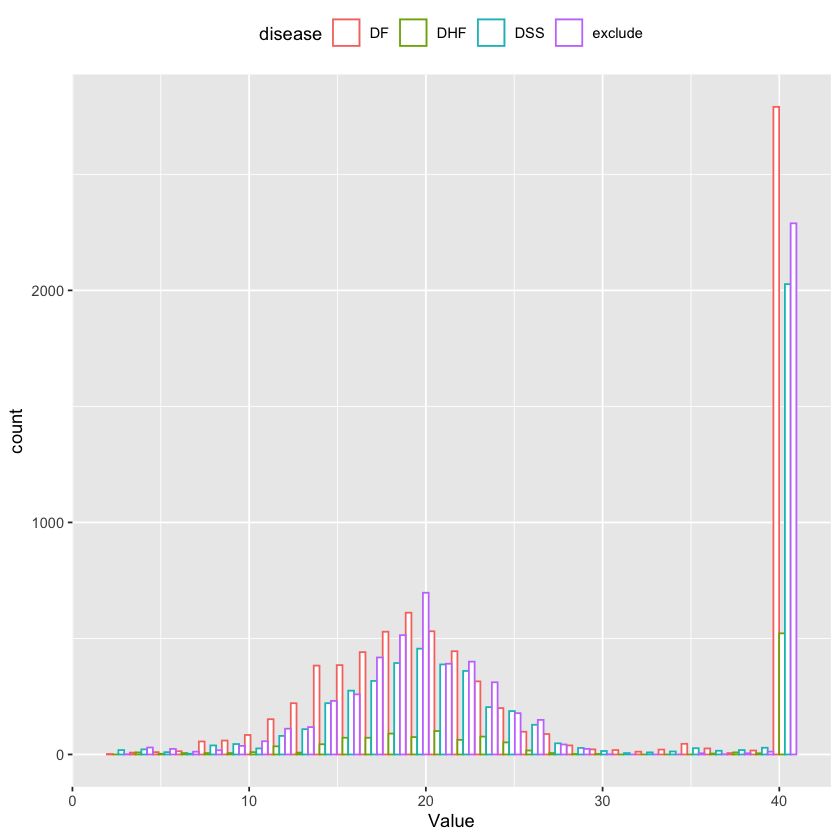

In [34]:
# Change colors
p <- ggplot(merged_df, aes(x=Value, color=disease)) + geom_histogram(fill="white", position="dodge") +
            theme(legend.position="top")
p

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


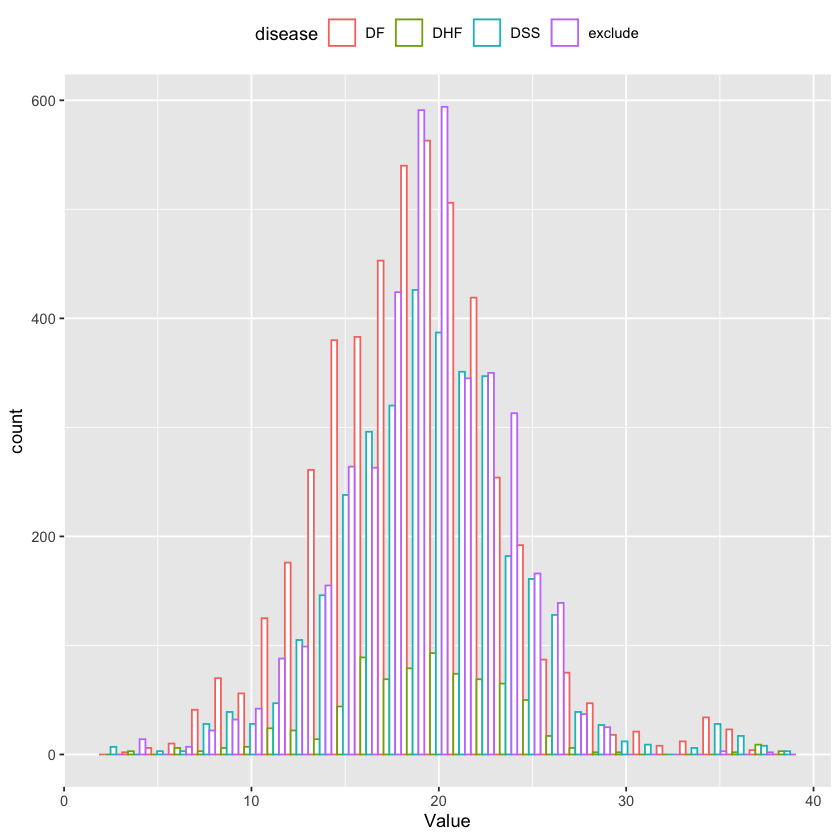

In [38]:
merged_df %>% filter((Quality > 0)) -> merged_df

# Change colors
p <- ggplot(merged_df, aes(x=Value, color=disease)) + geom_histogram(fill="white", position="dodge") +
            theme(legend.position="top")
p